# 모델생성과 성능평가 Lab

In [5]:
import numpy as np 
import pandas as pd 
import os

1. customer_scaled.csv 파일을 읽어서 customer_df에 저장하시오. 저장 후에 데이터의 특성을 탐색하시오.

In [6]:
customer_df = pd.read_csv('../../asset/customer_scaled.csv')

2. BikeBuyer를 제외한 컬럼으로 입력변수들로, BikeBuyer를 출력변수로 하고, 훈련 데이터와 테스트 데이터를 8:2로 분할하시오.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(customer_df.drop('BikeBuyer', axis=1), customer_df['BikeBuyer'], test_size=0.2, random_state=42)

3. 분류 모델의 성능을 출력하는 함수 get_clf_eval()을 작성하시오.

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score, accuracy_score, f1_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    print("정확도: {0:.4f}. 재현율: {1:.4f}, 정밀도: {2:.4f}, f1점수: {3:.4f}".format(accuracy, recall, precision, f1))

4. sklearn 패키지를 이용하여 MLP 모형을 만들고 분류 성능을 평가하시오(단 히든 레이어는 (8,8)로 하시오).

In [9]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8))
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
get_clf_eval(y_test, mlp_pred)

confusion matrix
[[ 711  964]
 [ 436 1560]]
정확도: 0.6186. 재현율: 0.7816, 정밀도: 0.6181, f1점수: 0.6903


In [10]:
from keras import models
from keras.layers import Input, Dense

5. keras를 이용해서 인공신경망 모델을 정의하고 학습하시오(단 히든 레이어는 (8,8)로 하시오).

In [11]:
# 모델 정의
model=models.Sequential()

## 입력층
model.add(Input(shape=(X_train.shape[1],))) ## 입력 데이터의 모양을 정의

## 은닉층 (8, 8)
### Dense(완전 연결 - 모든 뉴런이 연결됨) 층 추가
model.add(Dense(8, activation='relu')) # 활성화 함수 relu: 음수를 0으로, 양수는 그대로 둠
model.add(Dense(8, activation='relu'))

## 출력층
model.add(Dense(1,activation='sigmoid')) # 활성화 함수 sigmoid: 출력값을 0~1 사이로 변환 (이진 분류 문제에 적합)
print(model.summary())

# 학습 정의 (모델 컴파일)
model.compile(
  optimizer='rmsprop', ## 최적화 알고리즘
  loss='binary_crossentropy', ## 손실함수
  metrics=['accuracy'] ## 학습 평가 지표
)

# 학습하기
history=model.fit(
  X_train,
  y_train,
  epochs=200, ## 데이터셋 200번 반복 학습
  batch_size=128, ## 데이터를 128개씩 묶어 학습
  validation_split=0.3 ## 학습 데이터의 30%를 검증 데이터로 
)

# 학습 결과 확인하기
history_dict=history.history
print(history_dict.keys())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 0.6924 - val_accuracy: 0.5461 - val_loss: 0.6875
Epoch 2/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.5507 - loss: 0.6869 - val_accuracy: 0.5524 - val_loss: 0.6863
Epoch 3/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.5595 - loss: 0.6851 - val_accuracy: 0.5513 - val_loss: 0.6854
Epoch 4/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.5582 - loss: 0.6837 - val_accuracy: 0.5522 - val_loss: 0.6843
Epoch 5/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.5571 - loss: 0.6817 - val_accuracy: 0.5561 - val_loss: 0.6830
Epoch 6/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.5618 - loss: 0.6793 - val_accuracy: 0.5588 - val_loss: 0.6813
Epoch 7/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.5711 - loss: 0.6780 - val_accuracy: 0.5654 - val_loss: 0.6793
Epoch 8/200
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.5725 - loss: 0.6755 - val_a

6. 학습 중 Loss 함수를 그리시오. 

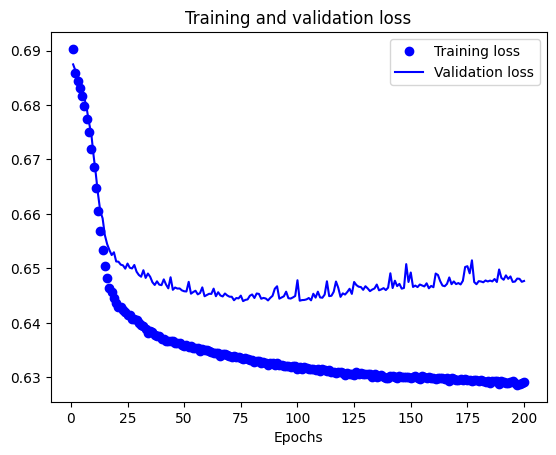

In [13]:
acc=history.history['accuracy'] ## 학습 정확도
val_acc=history.history['val_accuracy'] ## 검증 정확도
loss=history.history['loss'] ## 학습 손실
val_loss=history.history['val_loss'] ## 검증 손실
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt 

# Loss 함수 그리기
plt.plot(epochs,loss,'bo',label='Training loss') # bo: 파란 점으로 표시 
plt.plot(epochs,val_loss,'b',label='Validation loss') # b: 파란 선으로 표시
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

7. 학습 중 정확도 함수를 그리시오.

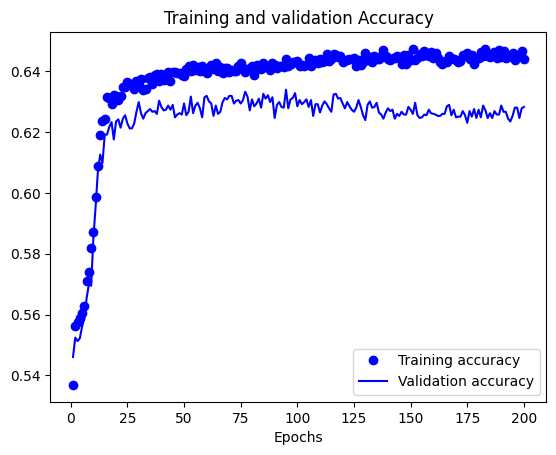

In [14]:
# 정확도 그리기
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

8. 테스트 데이터 집합에 대한 성능을 확인하시오.

In [15]:
predicted_result=model.predict(X_test)
predicted_result.shape

predicted_result[:5]
# 확률을 이진값(0 / 1)로 변환
predicted_target=pd.Series([1 if predicted_result[i]> 0.5 \
        else 0 for i in range(0, predicted_result.shape[0])])
get_clf_eval(y_test,predicted_target)

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step
confusion matrix
[[ 671 1004]
 [ 420 1576]]
정확도: 0.6121. 재현율: 0.7896, 정밀도: 0.6109, f1점수: 0.6888
